In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [58]:
class Image:
    def __init__(self, path):
        self.image = cv2.imread(path, 0)

    def show_image(self):
        cv2.imshow('Before modification', self.image)
        cv2.waitKey(0)
    
    def cal_tot(self):
        self.tot_pxls = self.image.shape[0] * self.image.shape[1]

    def intensity_dist(self):
        self.intensity_probabilities = np.zeros(256)
        self.intensity_counts = np.zeros(256, dtype=int)
        for row in self.image:
            for pixel in row:
                intensity = pixel
                self.intensity_counts[intensity] += 1
        self.intensity_probabilities = self.intensity_counts / self.tot_pxls

    def show_intensity_dist(self):
        plt.plot(self.intensity_counts, color='purple')
        plt.title('Intensity Distribution')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.show()
        print('the length of the img ', len(self.intensity_counts))
        print('counting of intensities ', self.intensity_counts)
        print('probability of intensities ', self.intensity_probabilities)


    def nearest_neighbor_interpolation(self, scale_factor):
        scaled_width = int(self.image.shape[1] * scale_factor)
        scaled_height = int(self.image.shape[0] * scale_factor)
        scaled_image = np.zeros((scaled_height, scaled_width), dtype=np.uint8)
        
        for i in range(scaled_height):
            for j in range(scaled_width):
                original_i = int(i / scale_factor)
                original_j = int(j / scale_factor)
                scaled_image[i, j] = self.image[original_i, original_j]
        
        return scaled_image
    def bilinear_interpolation(self, scale):
        scaled_height = int(self.image.shape[0] * scale)
        scaled_width = int(self.image.shape[1] * scale)
        scaled_image = np.zeros((scaled_height, scaled_width), dtype=np.uint8)

        for i in range(scaled_height):
            for j in range(scaled_width):
                src_i = i / scale
                src_j = j / scale
                i1 = int(np.floor(src_i))
                i2 = int(np.ceil(src_i))
                j1 = int(np.floor(src_j))
                j2 = int(np.ceil(src_j))
                
                if i2 >= self.image.shape[0]:
                    i2 = self.image.shape[0] - 1
                if j2 >= self.image.shape[1]:
                    j2 = self.image.shape[1] - 1
                
                dx = src_i - i1
                dy = src_j - j1

                # Perform bilinear interpolation
                interpolated_value = (1 - dx) * (1 - dy) * self.image[i1, j1] \
                                     + dx * (1 - dy) * self.image[i2, j1] \
                                     + (1 - dx) * dy * self.image[i1, j2] \
                                     + dx * dy * self.image[i2, j2]

                scaled_image[i, j] = int(interpolated_value)

        return scaled_image
    def bicubic_interpolation(self, scale_factor):
        height, width = self.image.shape

        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)

        scaled_image = np.zeros((new_height, new_width), dtype=np.uint8)

        for i in range(new_height):
            for j in range(new_width):
                x = (j + 0.5) / scale_factor - 0.5
                y = (i + 0.5) / scale_factor - 0.5

                x1 = int(np.floor(x))
                y1 = int(np.floor(y))

                dx = x - x1
                dy = y - y1

                interpolated_value = 0

                for m in range(-1, 3):
                    for n in range(-1, 3):
                        if (x1 + m >= 0 and x1 + m < width and y1 + n >= 0 and y1 + n < height):
                            weight_x = self.bicubic_weight(dx - m)
                            weight_y = self.bicubic_weight(dy - n)
                            interpolated_value += weight_x * weight_y * self.image[y1 + n, x1 + m]

                scaled_image[i, j] = interpolated_value.astype(np.uint8)

        return scaled_image
    def bicubic_weight(self, x):
        x = np.abs(x)
        if x <= 1:
            return 1 - 2 * x**2 + x**3
        elif x < 2:
            return 4 - 8 * x + 5 * x**2 - x**3
        else:
            return 0

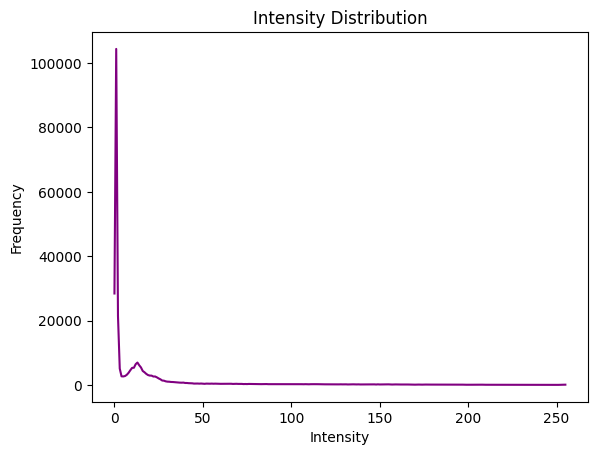

the length of the img  256
counting of intensities  [ 28431 104365  21426   5111   2716   2679   2808   3196   3816   4621
   5346   5378   6482   6994   6156   5472   4374   3974   3469   3107
   2947   2932   2655   2667   2398   2063   1791   1416   1361   1156
   1062   1039    964    948    896    831    767    756    739    765
    651    649    588    581    546    459    485    480    444    478
    445    388    454    442    424    456    418    440    416    410
    387    391    421    406    405    414    410    356    373    394
    362    375    363    313    333    310    351    340    330    330
    285    316    312    290    300    290    317    281    294    281
    282    278    296    259    319    270    284    285    287    291
    277    276    268    271    269    275    272    257    280    257
    245    273    263    279    290    273    256    231    245    234
    246    229    223    236    238    196    224    217    235    216
    233    228    193    

-1

In [59]:
img=Image("D:\desktop\Sixth Semester\Image Processing\Assignments\Assignment 2/01.jpg")
img.show_image()
img.cal_tot()
img.intensity_dist()
img.show_intensity_dist()
scaled_image = img.nearest_neighbor_interpolation(2.0)
# scaled_image = img.bilinear_interpolation(2.0)
# scaled_image = img.bicubic_interpolation(2.0)
cv2.imshow('Scaled Image', scaled_image)
cv2.waitKey(0)
